# Travail de mécanique quantique

Dans ce travail, nous allons étudier les fluides incompressibles à l'aide de l'équation de Navier-Stokes et en considérant un nombre de Reynolds très faible.

\begin{equation}
\frac{\partial u}{\partial t} + u \cdot \nabla u = -\frac{1}{\rho}\nabla p + \nu\nabla^2 u
\end{equation}

Pour ce faire, nous allons employer la formulation de la vorticité et de la fonction de courant ($\omega$ et $\psi$) ainsi que la  méthode de Jacobi pour résoudre le problème dit du flux de Stokes. Le grand avantage du flux de Stokes est la disparition des termes non-linéraires permettant une résolution plus simple du problème.

In [2]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Nous introduisons ci-dessous les paramètres initiaux de notre cavité qui nous permettrons de résoudre le problème du flux de Stockes dans notre cavité.

In [4]:
nx = 41
ny = 41

l = 1.
h = 1.

dx = l/(nx-1)
dy = h/(ny-1)

error_tolerance = 1e-6

Nous définissions ici la fonction L1error permettant de mesurer la norme de la différence L1 entre les itérations qui seront
réalisées par la suite.

In [5]:
def L1error(new, old):
    error = numpy.sum(numpy.abs(new-old))
    return error









Nous commençons notre problème à partir de l'équation de Navier-Stokes pour un fluide incompressible.

\begin{equation}
\frac{\partial u}{\partial t} + u \cdot \nabla u = -\frac{1}{\rho}\nabla p + \nu\nabla^2 u
\end{equation}

En approximant que le nombre de Reynolds est proche de 0, nous obtenons l'équation suivante :

\begin{equation}
0 = - \nabla p + \nabla^2 u
\end{equation}

En utilisant le rotationel nous avons alors :

\begin{equation}
\nabla \times - \nabla p = 0
\end{equation}

On définit $\nabla \times u = \omega$ la vorticité et on obtient alors l'équation :

\begin{equation}
\nabla ^2 \omega = 0
\end{equation}

Ainsi nous pouvons définir $\psi$ ainsi :

\begin{equation}
u = \frac{\partial \psi}{\partial y} \text{   et   } v = - \frac{\partial \psi}{\partial x}
\end{equation}

En deux dimensions, la vorticité peut être développée de la sorte :

\begin{equation}
\omega = \frac{\partial v}{\partial x} - \frac{\partial u}{\partial y}
\end{equation}

Avec les relations ci-dessus, nous obtenons la relation et le système d'équation d'un fluide ayant un nombre de Reynolds très faible suivant :

\begin{equation}
\nabla^2 \psi = -\omega
\end{equation}  

\begin{equation}
\nabla^2 \omega = 0
\end{equation}

\begin{equation}
\nabla^2 \psi = -\omega
\end{equation}

Les conditions aux bords sont les suivantes :

<img src="./figures/drivencavity.svg" width=400px>

Pour déterminer les valeurs aux bords de $\omega$, il nous faut partir de la relation

$$ \nabla^2 \psi = - \omega$$

le long du bord supérieur. Du fait de la solidité de la surface, il ne peut y avoir de vitesse selon l'axe y et ainsi la dérivée de $\psi$ par rapport à x est nulle. Cela donne donc

$$ \frac{\partial^2 \psi}{\partial y^2} = - \omega$$

Après une discrétisation centrale du second ordre 

\begin{equation}
\omega_j = - \left(\frac{\psi_{j+1} - 2\psi_j + \psi_{j-1}}{\Delta y^2}\right)
\end{equation}

Pour avoir la valeur de $\psi_{j+1}$ qui est hors du domaine, on discrétise $\frac{\partial \psi}{\partial y}$ au 3ème ordre

\begin{equation}
\left.\frac{\partial \psi}{\partial y}\right|_j = \frac{2\psi_{j+1} + 3\psi_j - 6\psi_{j-1} + \psi_{j-2}}{6 \Delta y}
\end{equation}

Nous savons que sur le bord supérieur $\left.\frac{\partial \psi}{\partial y}\right|_j = 1$. Ainsi, en isolant $\psi_{j+1}$ et en l'injectant dans l'équation (13) nous pouvons obtenir la condition aux bords suivante

\begin{equation}
\omega_{i,j} = -\frac{1}{2 \Delta y^2} (8\psi_{i, j-1} - \psi_{i, j-2}) - \frac{3}{\Delta y} + \mathcal{O}(\Delta y^2)
\end{equation}

Nous pouvons faire le même raisonnement pour le bord inférieur en n'oubliant pas que cette fois-ci $\left.\frac{\partial \psi}{\partial y}\right|_j = 0$. Donc

\begin{equation}
\omega_{i,j} = -\frac{1}{2 \Delta y^2} (8\psi_{i, j+1} - \psi_{i, j+2})  + \mathcal{O}(\Delta y^2)
\end{equation}

Il ne manque plus qu'à faire les mêmes calculs pour les bords gauche et droit :

 \begin{equation} \omega_{i,j} = -\frac{1}{2 \Delta y^2} (8\psi_{i-1, j} - \psi_{i-2, j}) + \mathcal{O}(\Delta y^2)
\end{equation}

 \begin{equation} \omega_{i,j} = -\frac{1}{2 \Delta y^2} (8\psi_{i+1, j} - \psi_{i+2, j}) + \mathcal{O}(\Delta y^2)
\end{equation}

On peut maintenant passer à la résolution numérique du problème. Pour cela, on résoud $\psi$ et $\omega$ simultanément grâce à la méthode de Jacobi. On demande de sortir de la boucle lorsque les différences entre 2 itérations sur $\psi$ ET $\omega$ sont suffisamment petites.

In [6]:
def solution(psi, omega, dx, dy, error_tolerance):
    
        l1_norm_1 = 1
        l1_norm_2 = 1
        
        while l1_norm_1 > error_tolerance or l1_norm_2 > error_tolerance:
            
            psik = psi.copy()
            omegak = omega.copy()
            
            
            psi [1:-1,1:-1] = 0.25 * (psik[1:-1,2:] + psik[1:-1,:-2] + psik[2:,1:-1] + psik[:-2,1:-1] + \
                                      dx**2*omegak[1:-1,1:-1])
            psi[:,0] = 0
            psi[:,-1] = 0
            psi[0,:] = 0
            psi[-1,:] = 0
            
            omega[1:-1,1:-1] = 0.25 * (omegak[1:-1,2:] + omegak[1:-1,:-2] + omegak[2:,1:-1] + omegak[:-2,1:-1])
            
            omega[:,-1] = -0.5 / dy**2 * (8 * psi[:,-2] - psi[:,-3]) - 3/dy
            omega[:,0] = -0.5 / dy**2 * (8 * psi[:,1] - psi[:,2])
            omega[-1,:] = -0.5 / dx**2 * (8 * psi[-2,:] - psi[-3,:])
            omega[0,:] = -0.5 / dx**2 * (8 * psi[1,:] - psi[2,:])
            
            
            
            l1_norm_1 = L1error(psi,psik)
            l1_norm_2 = L1error(omega,omegak)
        return psi, omega, l1_norm_1, l1_norm_2

Nous prenons comme condition initiale zéro partout pour les deux champs.

In [28]:
psi = numpy.zeros((ny,nx))
omega = numpy.zeros((ny,nx))

x = numpy.linspace(0,1,nx)
y = numpy.linspace(0,1,ny)

psi, omega, l1_norm_1, l1_norm_2 = solution(psi.copy(), omega.copy(), dx, dy, error_tolerance)
print("Les normes en L1 de la différences des deux dernières itérations pour psi et omega sont",l1_norm_1,"et", l1_norm_2)

Les normes en L1 de la différences des deux dernières itérations pour psi et omega sont 2.24232959691e-08 et 9.99748365654e-07


Vous voyons effectivement que les erreurs L1 entre deux itérations successives pour $\psi$ et $\omega$ sont bien inférieures à notre tolérance qui était de 1e-6.

Afin d'afficher le graphique correctement nous inversons les données en x et en y

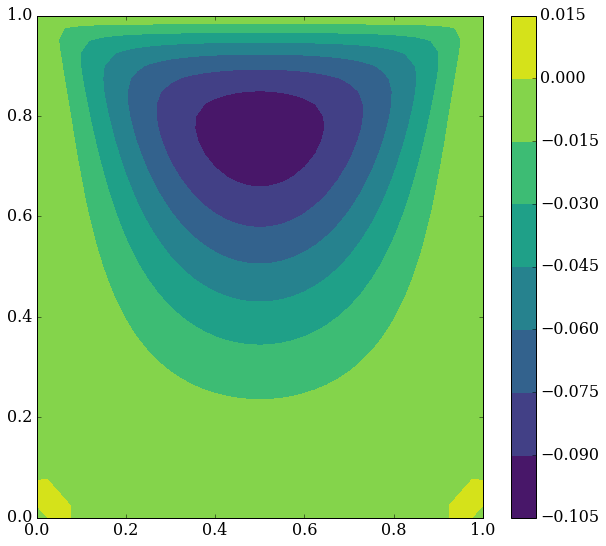

In [20]:
psid = psi.copy()
for i in range (nx) :
    for j in range (ny) :
        psi [i,j] = psid [j,i]
pyplot.figure(figsize=(10,9))
pyplot.contourf(x,y,psi,cmap=cm.viridis)
pyplot.colorbar();

Nous scannons nos données de $\psi$ et $\omega$ afin de trouver le maximum de leurs valeurs ici en dessous.
Ensuite nous affichons les 6 valeurs de $\psi$ demandées .

In [27]:
max = 0
for i in range(nx):
    for j in range(ny) :
        if numpy.abs(psi[i,j])>max :
            max=numpy.abs(psi[i,j])
print("La valeur maximal de |psi| est", max)

max = 0
for i in range(nx):
    for j in range(ny) :
        if numpy.abs(omega[i,j])>max :
            max=numpy.abs(omega[i,j])
print("La valeur maximal de |omega| est", max)

numpy.round(psi[32,::8], 4)

La valeur maximal de |psi| est 0.0998451724622
La valeur maximal de |omega| est 78.1926612286


array([ 0.    , -0.0575, -0.0944, -0.0944, -0.0575,  0.    ])